# Question 3 (20 pts) -- COMPLETE
The IRIS dataset and the binary classification (iris-setosa versus others). This dataset
is imbalanced, please implement a technique by using oversampling that will
produce a balanced dataset (no duplication). Think of ways of how data can be
generated.
Extra credit may be assigned if you train models for the generation part (you can use
scikit)

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats 

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :]  # we only take the first two features.
y = iris.target

In [ ]:
# order : ['setosa'-0 'versicolor'-1, 'virginica'-1]
y = np.where(y == 0,0,1)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
all = len(y)
ratioSet = np.count_nonzero(y == 0) /all
ratioRest= np.count_nonzero(y == 1) /all

In [ ]:
print("total base number of samples:", all, "setosa ratio:", ratioSet, "rest ratio:", ratioRest)

total base number of samples: 150 setosa ratio: 0.3333333333333333 rest ratio: 0.6666666666666666


([], <a list of 0 Text major ticklabel objects>)

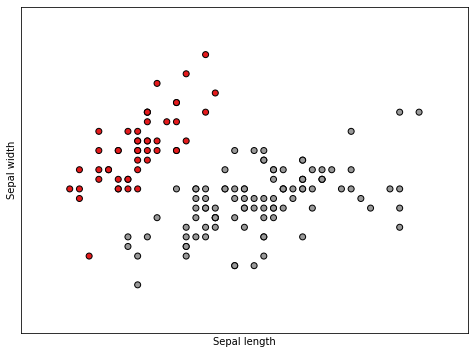

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, # color is c
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

Using data generation implimentation of oversampling should be done on setosa to get the number of samples around equal to eachother to imporve our data predicitons, meaning generation of an aditionall 50 samples of iris data classified as setosa

In [ ]:
# find the distribution all attributes for target 0 
X_df = pd.DataFrame(X, columns=iris.feature_names)
y_df = pd.DataFrame(y, columns={"target"})

In [ ]:
final = pd.concat([X_df,y_df],axis=1)

In [ ]:
findDist = final[final['target'] == 0]
findDist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  50 non-null     float64
 1   sepal width (cm)   50 non-null     float64
 2   petal length (cm)  50 non-null     float64
 3   petal width (cm)   50 non-null     float64
 4   target             50 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 2.3 KB


['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],

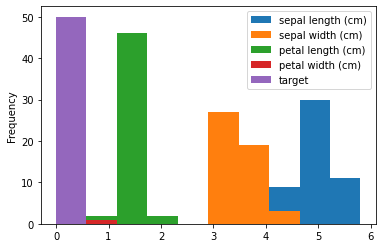

In [ ]:
findDist.plot(kind='hist')

In [ ]:
mins = pd.DataFrame( findDist[findDist > 0].min())
maxs = pd.DataFrame( findDist[findDist > 0].max())

Normal Distribution for sepal length, petal width, and petal length 

skewed sepal width but will just use normal dist

In [ ]:
def getData(lower, upper, mu = 0.5, sigma = 0.9, N = 50):
  sample = scipy.stats.truncnorm.rvs(
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
  return sample

def skewData(lower, upper, mu = 0.5, sigma = 0.1, N = 50, a = 4):
  sample = scipy.stats.skewnorm.rvs(a,
          (lower-mu)/sigma,(upper-mu)/sigma,loc=mu,scale=sigma,size=N)
  return sample

In [ ]:
sl = getData(mins[0].iloc[0],maxs[0].iloc[0])
sw = getData(mins[0].iloc[1],maxs[0].iloc[1])
pl = getData(mins[0].iloc[2],maxs[0].iloc[2])
pw = getData(mins[0].iloc[3], maxs[0].iloc[3])

shape = 50
value = 0

myarray = np.empty(shape, dtype=np.int)
myarray.fill(value)

In [ ]:
df = pd.DataFrame()
df[iris.feature_names[0]] = sl
df[iris.feature_names[1]] = sw
df[iris.feature_names[2]] = pl
df[iris.feature_names[3]] = pw
df['target'] = myarray

In [ ]:
finalFinal =  pd.concat([final, df], ignore_index=True)
finalFinal

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.100000,3.500000,1.400000,0.200000,0
1,4.900000,3.000000,1.400000,0.200000,0
2,4.700000,3.200000,1.300000,0.200000,0
3,4.600000,3.100000,1.500000,0.200000,0
4,5.000000,3.600000,1.400000,0.200000,0
...,...,...,...,...,...
195,4.351255,2.826592,1.828263,0.215229,0
196,4.303277,2.367623,1.278301,0.195007,0
197,4.533612,2.842749,1.265556,0.167713,0
198,4.310966,2.803396,1.865725,0.106286,0


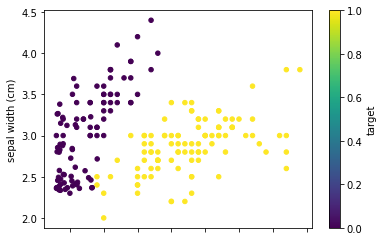

In [ ]:
finalFinal.plot.scatter(x='sepal length (cm)',
                      y='sepal width (cm)',
                      c='target',
                      colormap='viridis')

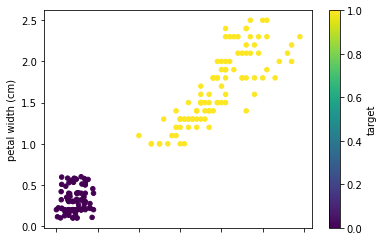

In [ ]:
finalFinal.plot.scatter(x='petal length (cm)',
                      y='petal width (cm)',
                      c='target',
                      colormap='viridis')